In [64]:
import praw
import pickle
import requests
import matplotlib.pyplot as plt

In [65]:
# I created a pickle file with my credentials in it so that my reddit info is not posted directly on github.
# If anyone knows that this still isn't safe... please let me know? Thanks.

credentials = pickle.load(open('../credentials.pkl', 'rb'))

client_id = credentials['client_id']
client_secret = credentials['client_secret']
user_agent = credentials['user_agent']
username = credentials['username']
password = credentials['password']

In [9]:
# This is all pretty much pasted directly from the Python Reddit API Wrapper (praw) website.
# I only have a slight idea of what it's doing.
client_auth = requests.auth.HTTPBasicAuth(client_id, client_secret)
post_data = {"grant_type": "password", "username": username, "password": password}
headers = {"User-Agent": user_agent}
response = requests.post("https://www.reddit.com/api/v1/access_token", auth=client_auth, data=post_data, headers=headers)
headers = {"Authorization": "bearer "+str(response.json()['access_token']),
          "User-Agent": user_agent}
response = requests.get("https://oauth.reddit.com/api/v1/me", headers=headers)

In [10]:
# To interact with reddit's website, you must create a reddit instance.
# I am actually not sure if I need the cell above for pulling data off of reddit,
# since I will not be posting anything.
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent,
                     username=username,
                     password=password)


In [130]:
comment_authors = {}
for submission in reddit.subreddit('LearnMachineLearning').top(limit=50):
    submission.comments.replace_more(limit=None)
    comment_queue = submission.comments[:]
    while comment_queue:
        comment = comment_queue.pop(0)
        # Some of the comment.author return None, and do not have a name attribute.
        # Annoyingly, we have to check for that and I did it in a not very pythonic way.
        if comment.author:
            new_value = comment_authors.setdefault(comment.author.name, 0) + 1
            comment_authors[comment.author.name] = new_value
        else:
            if comment.body != '[Deleted]':
                new_value = comment_authors.setdefault(comment.author, 0) + 1
                comment_authors[comment.author] = new_value
            else:
                pass

Let's see if we can find the number of people who have deleted their accounts

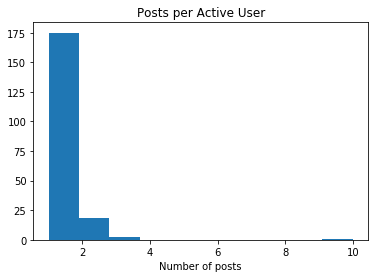

In [144]:
plt.hist(comment_authors.values())
plt.title('Posts per Active User')
plt.xlabel('Number of posts')

plt.show()

In [143]:
print('Number of deleted accounts:', comment_authors[None])
print('Total number of commenting accounts:', len(comment_authors))
print('Churn percentage of active users: % {0:.2f}'.format(100 * comment_authors[None] / len(comment_authors)))

Number of deleted accounts: 10
Total number of commenting accounts: 196
Churn percentage of active users: % 5.10
